## **Block 1: Feature Review & Enhancement**

**Feature Engineering**

- Handling Missing Values
The postal_code column had missing values, which were replaced with 'unknown' to ensure completeness in categorical encoding.
Other features did not have significant missing values, so no additional imputation was required.

- Feature Selection & Transformation
- Dropped Features:

monthly_visits: Considered redundant due to its correlation with pickup_count_last_30_days.

pickup_count_last_7_days: Considered redundant due to its correlation with weekly_visits.

pickup_count_last_90_days: Considered redundant due to its correlation with total_dependebts_3_months.

client_return_within_3_months (target variable) was removed from feature space.

- Numerical Features (Standard Scaled):
weekly_visits, total_dependents_3_months, pickup_count_last_90_days, pickup_count_last_30_days, pickup_count_last_14_days, pickup_count_last_7_days, pickup_week.

- Categorical Features (One-Hot Encoded):
postal_code, title, Holidays.

Numerical features were standardized using StandardScaler().


**Chi-Square Test for Feature Selection**

- The Chi-Square Test was conducted to assess the statistical relationship between categorical features and the target variable.
(client_return_within_3_months).
- Features with p < 0.05, has a significant relationship with the target variable were retained.


- Features retained are:

'title', 'Holidays', 'pickup_week', 'pickup_count_last_7_days',
       'pickup_count_last_14_days', 'pickup_count_last_30_days',
       'pickup_count_last_90_days', 'time_since_first_visit',
       'total_dependents_3_months', 'weekly_visits', 'monthly_visits',
       'client_return_within_3_months', 'postal_code'


In [ ]:
import pandas as pd


In [ ]:
# set display to view all columns
pd.set_option('display.max_columns', None)

## Import Churn dataframe
This dataframe contains selected features for model building

In [ ]:
# import churn dataframe
churn_df = pd.read_csv('churn_df.csv')
churn_df.head()

,title,Holidays,pickup_week,pickup_count_last_7_days,pickup_count_last_14_days,pickup_count_last_30_days,pickup_count_last_90_days,time_since_first_visit,total_dependents_3_months,weekly_visits,monthly_visits,client_return_within_3_months,postal_code
0,Food Hamper,Easter Monday,16,2.0,3.0,16.0,107.0,240,353.0,2.0,16.0,0,T5E 4C7
1,Food Hamper,Easter Monday,15,3.0,8.0,31.0,125.0,231,404.0,3.0,31.0,0,NaN
2,Raj (Pedro's whatsapp) New Hamper,Heritage Day,34,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,0,T5H 2Z8
3,Abdulhalim's Hamper,Labour Day,36,1.0,1.0,2.0,2.0,16,7.0,1.0,2.0,0,T5C 1E8
4,Sadek's Hamper,Labour Day,37,2.0,2.0,3.0,3.0,21,12.0,2.0,3.0,0,T6W 0G6


In [ ]:
churn_df.shape

(1070, 13)

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          1070 non-null   object 
 1   Holidays                       1070 non-null   object 
 2   pickup_week                    1070 non-null   int64  
 3   pickup_count_last_7_days       1070 non-null   float64
 4   pickup_count_last_14_days      1070 non-null   float64
 5   pickup_count_last_30_days      1070 non-null   float64
 6   pickup_count_last_90_days      1070 non-null   float64
 7   time_since_first_visit         1070 non-null   int64  
 8   total_dependents_3_months      1070 non-null   float64
 9   weekly_visits                  1070 non-null   float64
 10  monthly_visits                 1070 non-null   float64
 11  client_return_within_3_months  1070 non-null   int64  
 12  postal_code                    999 non-null    o

In [ ]:
# fill missing values in postal code
churn_df['postal_code'] = churn_df['postal_code'].fillna('unknown')

Update Column categories

In [ ]:
# change applicable features to categories

churn_df['Holidays'] = churn_df['Holidays'].astype('category')
churn_df['postal_code'] = churn_df['postal_code'].astype('category')

In [ ]:
# validate change in dtype after assigning features to categories
churn_df.dtypes

,0
title,object
Holidays,category
pickup_week,int64
pickup_count_last_7_days,float64
pickup_count_last_14_days,float64
pickup_count_last_30_days,float64
pickup_count_last_90_days,float64
time_since_first_visit,int64
total_dependents_3_months,float64
weekly_visits,float64


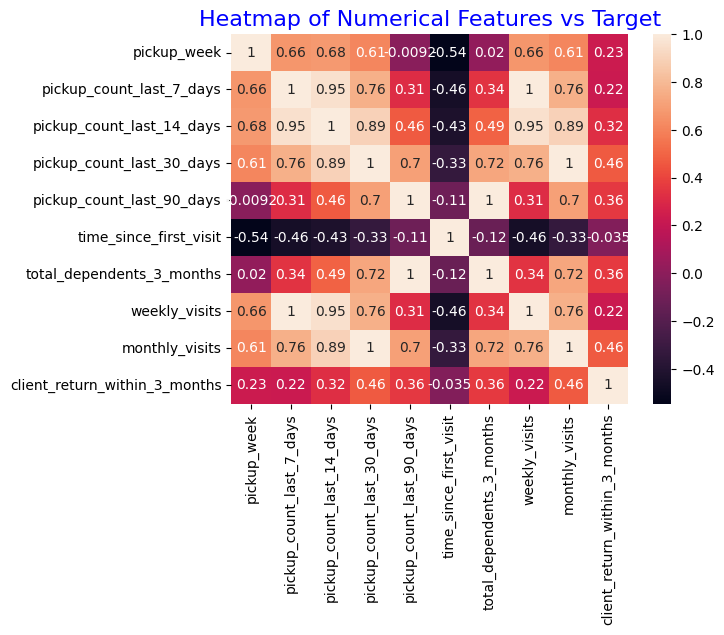

In [ ]:
# plot heatmap

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(churn_df.corr(numeric_only=True), annot=True)
plt.title('Heatmap of Numerical Features vs Target', c= 'blue', size = 16)
plt.show()


In [ ]:
# Drop highly correlated features to prevent data leakage
churn_df = churn_df.drop(columns=['pickup_count_last_7_days', 'monthly_visits', 'total_dependents_3_months', 'title', 'postal_code', 'Holidays'])  # Remove redundant features

In [ ]:
churn_df.shape

(1070, 7)

In [ ]:
churn_df.columns

Index(['pickup_week', 'pickup_count_last_14_days', 'pickup_count_last_30_days',
       'pickup_count_last_90_days', 'time_since_first_visit', 'weekly_visits',
       'client_return_within_3_months'],
      dtype='object')

Check Imbalance

client_return_within_3_months
0    0.833645
1    0.166355
Name: proportion, dtype: float64
client_return_within_3_months
0    0.833645
1    0.166355
Name: proportion, dtype: float64


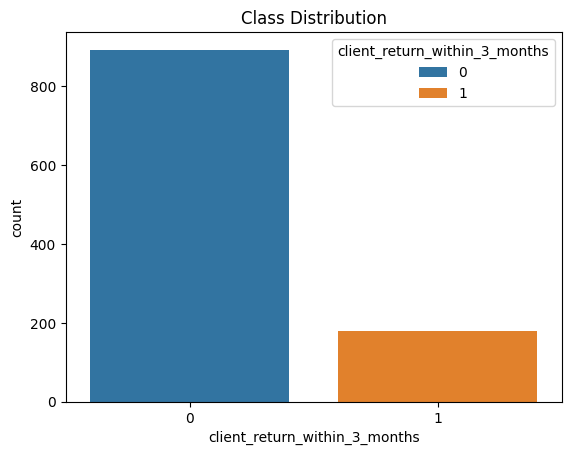

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print(churn_df['client_return_within_3_months'].value_counts(normalize=True))
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print(churn_df['client_return_within_3_months'].value_counts(normalize=True))

# Visualize the class imbalance
sns.countplot(x=churn_df['client_return_within_3_months'], hue=churn_df['client_return_within_3_months'])
plt.title("Class Distribution")
plt.show()


In [ ]:
# split dataset into train and test variables
from sklearn.model_selection import train_test_split

# Define X and y
X = churn_df.drop(columns=['client_return_within_3_months'])
y = churn_df['client_return_within_3_months']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### **Encode categorical set**

In [ ]:
"""!pip install category_encoders
import pandas as pd
from category_encoders import TargetEncoder


# Create a TargetEncoder instance
encoder = TargetEncoder(cols=['postal_code', 'Holidays'])

# Fit the encoder on the training data
encoder.fit(X_train, y_train)

# Transform the training and testing data
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)"""





"!pip install category_encoders\nimport pandas as pd\nfrom category_encoders import TargetEncoder\n\n\n# Create a TargetEncoder instance\nencoder = TargetEncoder(cols=['postal_code', 'Holidays'])\n\n# Fit the encoder on the training data\nencoder.fit(X_train, y_train)\n\n# Transform the training and testing data\nX_train_encoded = encoder.transform(X_train)\nX_test_encoded = encoder.transform(X_test)"

In [ ]:

import pandas as pd
from category_encoders import TargetEncoder

# Check available columns in X_train
print(X_train.columns)

# Create a TargetEncoder instance with columns that exist in X_train
# Update this list to include the actual categorical columns you want to encode
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
encoder = TargetEncoder(cols=categorical_cols)

# Fit the encoder on the training data
encoder.fit(X_train, y_train)

# Transform the training and testing data
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

Index(['pickup_week', 'pickup_count_last_14_days', 'pickup_count_last_30_days',
       'pickup_count_last_90_days', 'time_since_first_visit', 'weekly_visits'],
      dtype='object')


In [ ]:
X_train_encoded.head()

,pickup_week,pickup_count_last_14_days,pickup_count_last_30_days,pickup_count_last_90_days,time_since_first_visit,weekly_visits
1014,26,9.0,16.0,45.0,310,6.0
266,49,332.0,539.0,580.0,105,178.0
860,49,291.0,459.0,500.0,104,168.0
398,45,68.0,81.0,94.0,79,52.0
297,49,308.0,508.0,549.0,105,158.0


## Normalize Train Set

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df' and the numerical columns are in a list called 'numerical_cols'
numerical_cols = ['weekly_visits', 'pickup_count_last_30_days',
                  'pickup_count_last_14_days', 'pickup_week', 'time_since_first_visit']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training data
# Replace 'X_train' with your training data DataFrame
scaler.fit(X_train_encoded[numerical_cols])

# Transform the numerical features of both training and testing data
X_train_encoded[numerical_cols] = scaler.transform(X_train_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

In [ ]:
X_train_encoded.head()

,pickup_week,pickup_count_last_14_days,pickup_count_last_30_days,pickup_count_last_90_days,time_since_first_visit,weekly_visits
1014,-0.900690,-1.306131,-1.250972,45.0,2.782292,-1.287877
266,0.599038,1.383807,1.220248,580.0,-0.310005,1.394075
860,0.599038,1.042359,0.842241,500.0,-0.325089,1.238148
398,0.338216,-0.814780,-0.943841,94.0,-0.702199,-0.570611
297,0.599038,1.183935,1.073770,549.0,-0.310005,1.082220


In [ ]:
print(X_train.shape)
print(X_test.shape)

(856, 6)
(214, 6)


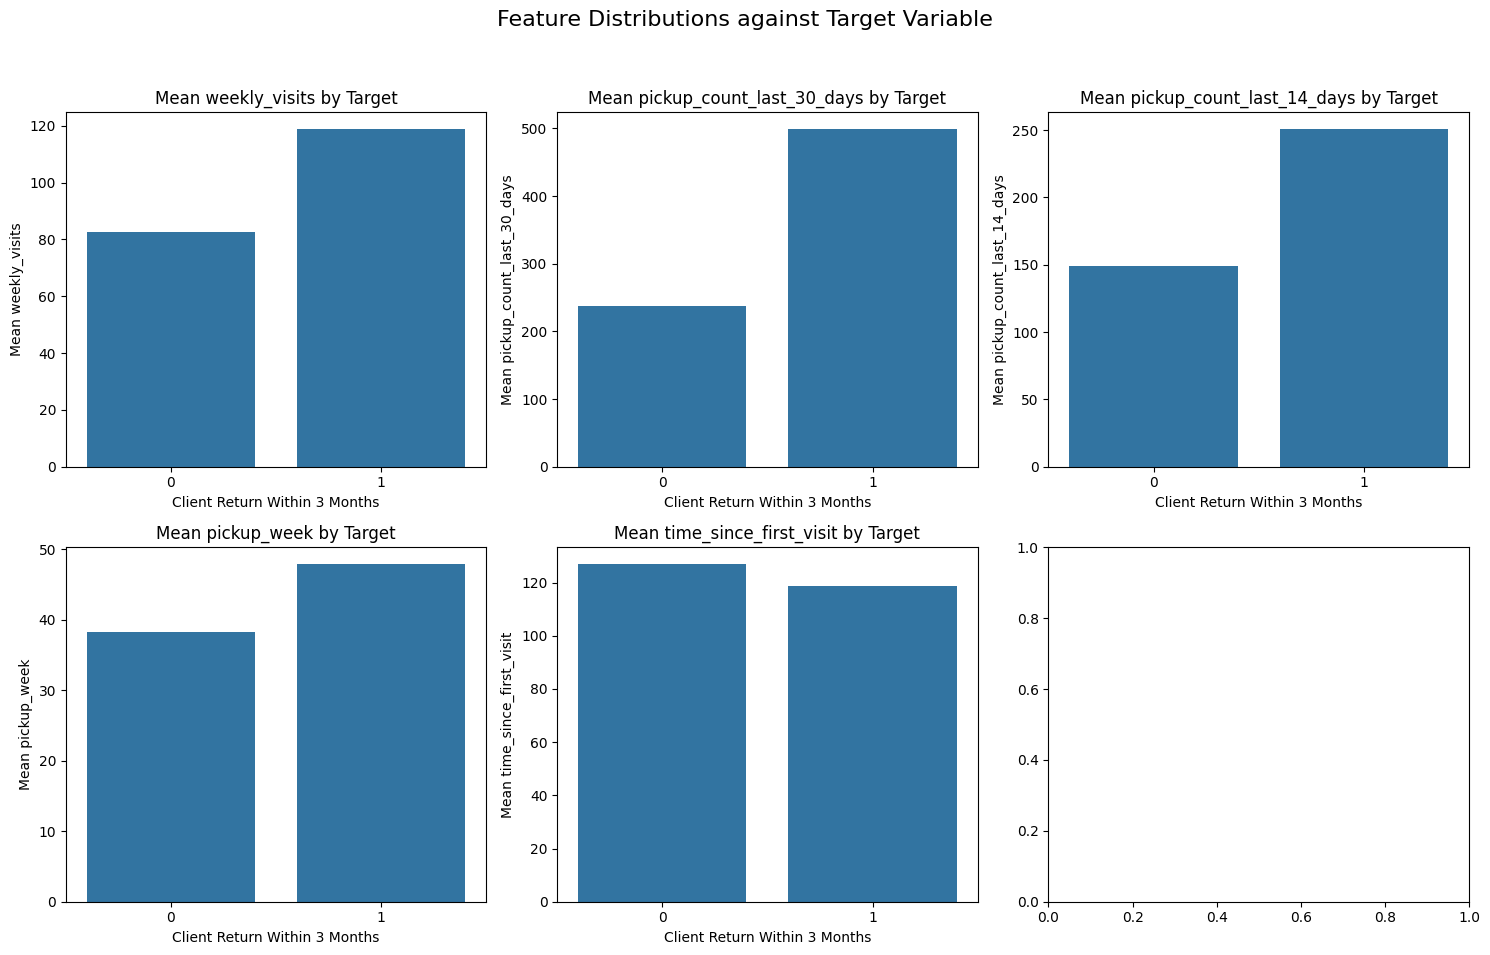

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of features to visualize against the target
# Removed: 'total_dependents_3_months', 'Holidays', 'postal_code'
features_to_visualize = ['weekly_visits', 'pickup_count_last_30_days',
                         'pickup_count_last_14_days', 'pickup_week', 'time_since_first_visit']

# Create subplots for visualization
num_cols = 3  # Number of columns in the subplot grid
num_rows = int((len(features_to_visualize) + num_cols - 1) / num_cols)  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed
fig.suptitle('Feature Distributions against Target Variable', fontsize=16)  # Overall title

# Iterate through features and create visualizations
for i, feature in enumerate(features_to_visualize):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Choose appropriate plot type based on feature type
    if X_train[feature].dtype == 'object' or X_train[feature].dtype.name == 'category':
        # Countplot for categorical features, grouped by target variable
        sns.countplot(x=feature, hue='client_return_within_3_months', data=pd.concat([X_train, y_train], axis=1), ax=ax)
        ax.set_title(f'Distribution of {feature} by Target')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
    else:
        # Bar chart for numerical features, grouped by target variable
        # Calculate mean values for each target class
        mean_values = X_train.groupby(y_train)[feature].mean().reset_index()

        # Create bar chart
        sns.barplot(x='client_return_within_3_months', y=feature, data=mean_values, ax=ax)
        ax.set_title(f'Mean {feature} by Target')
        ax.set_xlabel('Client Return Within 3 Months')
        ax.set_ylabel(f'Mean {feature}')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.show()

In [ ]:
"""import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of features to visualize against the target
features_to_visualize = ['weekly_visits', 'total_dependents_3_months', 'pickup_count_last_30_days',
                         'pickup_count_last_14_days', 'pickup_week', 'time_since_first_visit',
                         'Holidays', 'postal_code']

# Create subplots for visualization
num_cols = 3  # Number of columns in the subplot grid
num_rows = int((len(features_to_visualize) + num_cols - 1) / num_cols)  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed
fig.suptitle('Feature Distributions against Target Variable', fontsize=16)  # Overall title

# Iterate through features and create visualizations
for i, feature in enumerate(features_to_visualize):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Choose appropriate plot type based on feature type
    if X_train[feature].dtype == 'object' or X_train[feature].dtype.name == 'category':
        # Countplot for categorical features, grouped by target variable
        sns.countplot(x=feature, hue='client_return_within_3_months', data=pd.concat([X_train, y_train], axis=1), ax=ax)
        ax.set_title(f'Distribution of {feature} by Target')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
    else:
        # Bar chart for numerical features, grouped by target variable
        # Calculate mean values for each target class
        mean_values = X_train.groupby(y_train)[feature].mean().reset_index()

        # Create bar chart
        sns.barplot(x='client_return_within_3_months', y=feature, data=mean_values, ax=ax)
        ax.set_title(f'Mean {feature} by Target')
        ax.set_xlabel('Client Return Within 3 Months')
        ax.set_ylabel(f'Mean {feature}')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.show()"""

"import matplotlib.pyplot as plt\nimport seaborn as sns\nimport numpy as np\n\n# List of features to visualize against the target\nfeatures_to_visualize = ['weekly_visits', 'total_dependents_3_months', 'pickup_count_last_30_days',\n                         'pickup_count_last_14_days', 'pickup_week', 'time_since_first_visit',\n                         'Holidays', 'postal_code']\n\n# Create subplots for visualization\nnum_cols = 3  # Number of columns in the subplot grid\nnum_rows = int((len(features_to_visualize) + num_cols - 1) / num_cols)  # Calculate number of rows\n\nfig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed\nfig.suptitle('Feature Distributions against Target Variable', fontsize=16)  # Overall title\n\n# Iterate through features and create visualizations\nfor i, feature in enumerate(features_to_visualize):\n    row = i // num_cols\n    col = i % num_cols\n    ax = axes[row, col]\n\n    # Choose appropriate plot type based on

#### **Balance the target feature**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Assuming `X` is already target encoded
X = churn_df.drop(columns=['client_return_within_3_months']).copy()  # Features
y = churn_df['client_return_within_3_months']  # Target

# Check class distribution before oversampling
print("Before Oversampling:", Counter(y))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# Check class distribution after oversampling
print("After Oversampling:", Counter(y_resampled))

# Convert back to DataFrame (Optional)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(y_resampled, columns=['client_return_within_3_months'])], axis=1)

# Display first few rows of the resampled dataset
df_resampled.head()


Before Oversampling: Counter({0: 892, 1: 178})
After Oversampling: Counter({0: 714, 1: 714})


,pickup_week,pickup_count_last_14_days,pickup_count_last_30_days,pickup_count_last_90_days,time_since_first_visit,weekly_visits,client_return_within_3_months
0,-0.900690,-1.306131,-1.250972,45.0,2.782292,-1.287877,0
1,0.599038,1.383807,1.220248,580.0,-0.310005,1.394075,0
2,0.599038,1.042359,0.842241,500.0,-0.325089,1.238148,0
3,0.338216,-0.814780,-0.943841,94.0,-0.702199,-0.570611,0
4,0.599038,1.183935,1.073770,549.0,-0.310005,1.082220,1


In [ ]:
print(df_resampled.shape)


(1428, 7)


In [ ]:
X_test_resampled = encoder.transform(X_test)  # Assuming 'encoder' is your TargetEncoder
X_test_resampled[numerical_cols] = scaler.transform(X_test_resampled[numerical_cols])  # Assuming 'scaler' is your StandardScaler


## **Block 2: Model Selection & Training**

### Model Building

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline  # Use imbalanced-learn's Pipeline to apply SMOTE inside CV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

import numpy as np

# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC(random_state=42, gamma='scale', C=1, kernel='rbf')),
    ('Naive Bayes', GaussianNB())
]

# Define cross-validation folds
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = ['precision', 'recall', 'f1', 'roc_auc']
model_results = {metric: [] for metric in scoring_metrics}

# Iterate through models
for name, model in models:
    print(f"Evaluating {name}...")

    # Define pipeline with imputation, SMOTE, and model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle NaNs
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE inside CV
        ('model', model)  # Model
    ])

    # Evaluate each metric
    for metric in scoring_metrics:
        cv_results = cross_val_score(pipeline, X_resampled, y_resampled, cv=cv, scoring=metric)
        model_results[metric].append((name, np.mean(cv_results), np.std(cv_results)))

# Print results
print("\n Summary of Model Performance:")
for metric, results in model_results.items():
    print(f"\n {metric.upper()} Scores:")
    for name, mean, std in sorted(results, key=lambda x: x[1], reverse=True):
        print(f"{name}: Mean = {mean:.4f}, Std Dev = {std:.4f}")


Evaluating Random Forest...
Evaluating Logistic Regression...
Evaluating KNN...
Evaluating SVC...
Evaluating Naive Bayes...

 Summary of Model Performance:

 PRECISION Scores:
Random Forest: Mean = 0.8355, Std Dev = 0.0349
KNN: Mean = 0.8242, Std Dev = 0.0327
Logistic Regression: Mean = 0.8073, Std Dev = 0.0379
SVC: Mean = 0.7422, Std Dev = 0.0241
Naive Bayes: Mean = 0.6970, Std Dev = 0.0278

 RECALL Scores:
KNN: Mean = 0.9775, Std Dev = 0.0186
Random Forest: Mean = 0.9369, Std Dev = 0.0127
SVC: Mean = 0.9076, Std Dev = 0.0031
Naive Bayes: Mean = 0.9076, Std Dev = 0.0031
Logistic Regression: Mean = 0.9005, Std Dev = 0.0139

 F1 Scores:
KNN: Mean = 0.8940, Std Dev = 0.0223
Random Forest: Mean = 0.8829, Std Dev = 0.0207
Logistic Regression: Mean = 0.8510, Std Dev = 0.0246
SVC: Mean = 0.8164, Std Dev = 0.0146
Naive Bayes: Mean = 0.7882, Std Dev = 0.0187

 ROC_AUC Scores:
Random Forest: Mean = 0.9085, Std Dev = 0.0251
Logistic Regression: Mean = 0.8695, Std Dev = 0.0288
KNN: Mean = 0.8529,

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline  # Use imbalanced-learn's Pipeline to apply SMOTE inside CV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter = 1000)),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC(random_state=42, gamma='scale', C=1, kernel='rbf')),
    ('Naive Bayes', GaussianNB())
]

# Define cross-validation folds
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = ['precision', 'recall', 'f1', 'roc_auc']
model_results = {metric: [] for metric in scoring_metrics}

# Iterate through models
for name, model in models:
    print(f"Evaluating {name}...")

    # Define pipeline with imputation, SMOTE, and model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle NaNs
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE inside CV
        ('model', model)  # Model
    ])

    # Evaluate each metric
    for metric in scoring_metrics:
        cv_results = cross_val_score(pipeline, X_resampled, y_resampled, cv=cv, scoring=metric)
        model_results[metric].append((name, np.mean(cv_results), np.std(cv_results)))

# Find the best performing model for each metric
best_models = {}

for metric, results in model_results.items():
    # Sort models by mean score in descending order for the current metric
    best_model = sorted(results, key=lambda x: x[1], reverse=True)[0]
    best_models[metric] = best_model

# Print results
print("\nSummary of Best Performing Models:")
for metric, (name, mean, std) in best_models.items():
    print(f"{metric.upper()}: Best Model = {name}, Mean = {mean:.4f}, Std Dev = {std:.4f}")


Evaluating Random Forest...
Evaluating Logistic Regression...
Evaluating KNN...
Evaluating SVC...
Evaluating Naive Bayes...

Summary of Best Performing Models:
PRECISION: Best Model = Random Forest, Mean = 0.8355, Std Dev = 0.0349
RECALL: Best Model = KNN, Mean = 0.9775, Std Dev = 0.0186
F1: Best Model = KNN, Mean = 0.8940, Std Dev = 0.0223
ROC_AUC: Best Model = Random Forest, Mean = 0.9085, Std Dev = 0.0251


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Instantiating the RandomForestClassifier
RF = RandomForestClassifier()

# Default parameters
print(RF.get_params())

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object with multiple metrics
grid_search = GridSearchCV(estimator=RF,
                           param_grid=param_grid,
                           cv=3,  # Number of cross-validation folds
                           scoring=['precision', 'recall', 'f1', 'roc_auc'],  # Multiple metrics
                           refit='f1',
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_resampled, y_resampled)

# Use the best estimator from grid search
best_rf = grid_search.best_estimator_

# Print the best estimator (best hyperparameters)
print(f"Best RandomForestClassifier: {best_rf}")

# Evaluate the best estimator using other metrics on the validation/test set
y_pred = best_rf.predict(X_resampled)

# Calculate other metrics
precision = precision_score(y_resampled, y_pred)
recall = recall_score(y_resampled, y_pred)
f1 = f1_score(y_resampled, y_pred)
roc_auc = roc_auc_score(y_resampled, best_rf.predict_proba(X_resampled)[:, 1])

# Print the metrics
print("\nEvaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best RandomForestClassifier: RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=150)

Evaluation Metrics:
Precision: 0.8686
Recall: 1.0000
F1 Score: 0.9297
ROC AUC: 0.9876


## **Block 3: Model Evaluation & Diagnostics**

Accuracy: 0.8224
Precision: 0.4839
Recall: 0.8333
F1-Score: 0.6122
ROC AUC: 0.8268
Confusion Matrix:
[[146  32]
 [  6  30]]


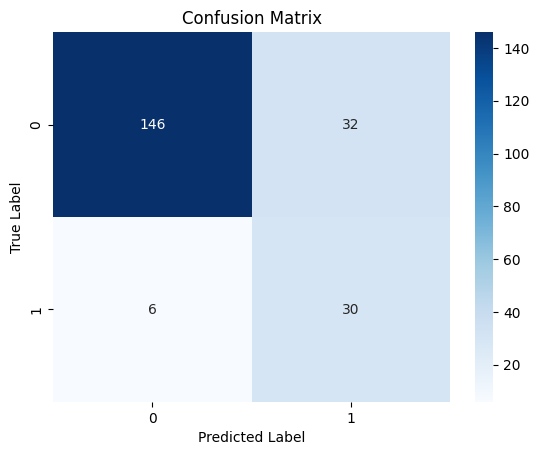

In [ ]:
# Predict on the transformed test set
y_pred = best_rf.predict(X_test_resampled)


# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()




In [ ]:
# print classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       178
           1       0.48      0.83      0.61        36

    accuracy                           0.82       214
   macro avg       0.72      0.83      0.75       214
weighted avg       0.88      0.82      0.84       214



## **Block 4: Model Optimization & Hyperparameter Tuning**


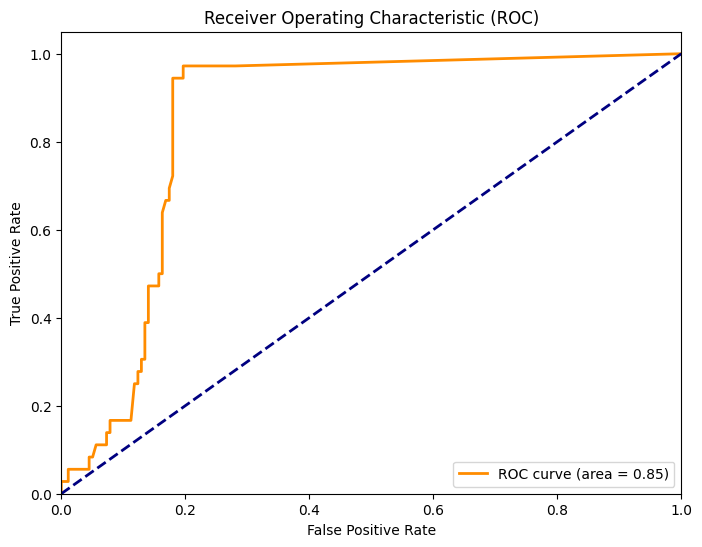

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
# Changed from y_test_resampled_df to X_test_resampled
y_probs = best_rf.predict_proba(X_test_resampled)[:, 1]  # Probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# save model as pickle file

import pickle

# Save the model to a file
filename = 'RF_model.pkl'  # Choose a filename for your model
with open(filename, 'wb') as file:
    pickle.dump(best_rf, file)

print(f"Model saved to {filename}")


Model saved to RF_model.pkl


## **SHAP REPORT**

**Install / Import Required Libraries**

In [ ]:
pip install shap

In [ ]:
import shap
import numpy as np

In [ ]:
# validate model is tree based

print(type(best_rf))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
# initializes the TreeExplainer with the model

explainer = shap.TreeExplainer(best_rf)

<Figure size 640x480 with 0 Axes>

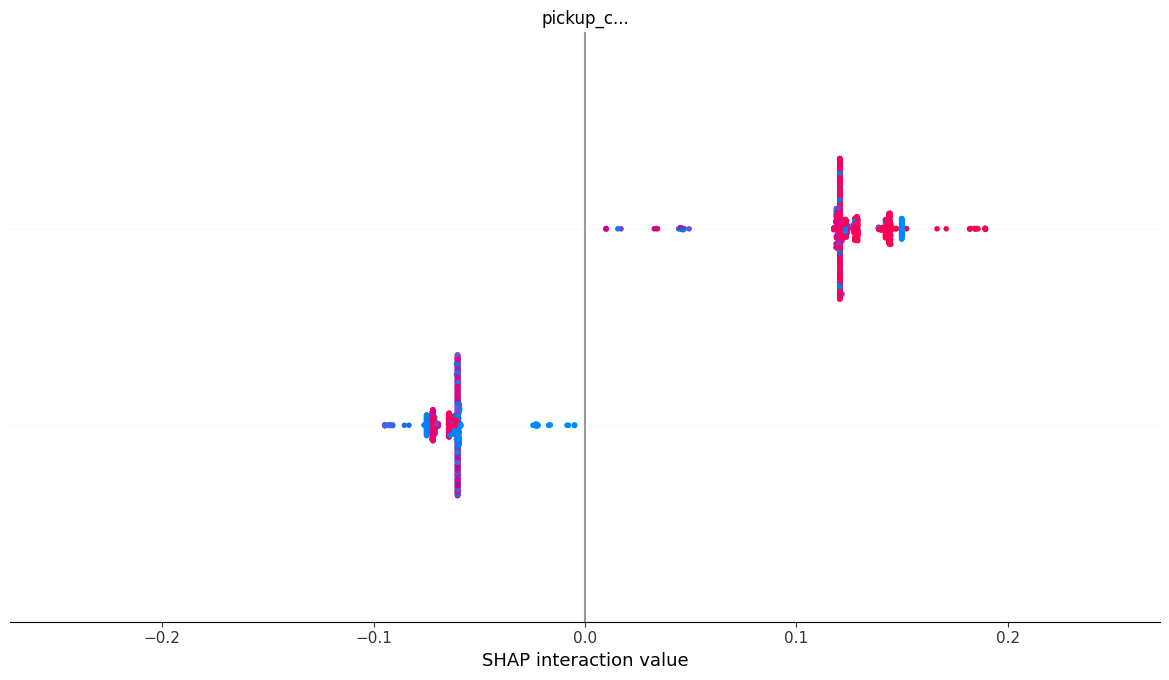

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset (replace with your actual dataset)
df = churn_df

X = df.drop(columns=['client_return_within_3_months'])
y = df['client_return_within_3_months']


# Load trained model

model = RandomForestClassifier()
model = best_rf


# Compute SHAP values
explainer = shap.TreeExplainer(model)

shap_values = explainer(X)


# Generate summary plot

shap.summary_plot(shap_values, X, plot_type="bar")

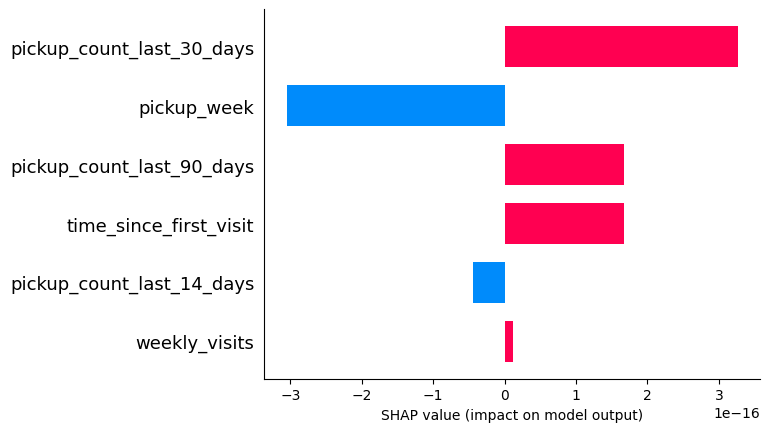

In [ ]:
# plotting SHAP values against features

# Using shap_values from explainer.shap_values(X_test_resampled)
shap_values = explainer.shap_values(X_test_resampled, check_additivity=False)  # disable additivity check

# Get the mean SHAP value for each feature across all classes for the first instance
mean_shap_values = shap_values[0].mean(axis=1)

# Get original feature names from before SMOTE (from X_train)
original_feature_names = X_train.columns.tolist()

# Plot the mean SHAP values with feature names
shap.bar_plot(mean_shap_values, feature_names=original_feature_names)

In [ ]:
# export churn df to csv
churn_df.to_csv('churn_data.csv', index=False)
print("churn_df has been exported to 'churn_data.csv'")